In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import pandas.testing as tm

In [2]:
df = pd.read_csv(r'D:\Masters\DMML\Project\Datasets\autos.csv', encoding="ISO-8859-1")

In [3]:
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [4]:
#removing unwanted columns

In [5]:
df.drop('index',axis=1,inplace = True)
df.drop('dateCrawled',axis=1,inplace = True)
df.drop('dateCreated',axis=1,inplace = True)
df.drop('nrOfPictures',axis=1,inplace = True)
df.drop('postalCode',axis=1,inplace = True)
df.drop('lastSeen',axis=1,inplace = True)

In [6]:
df

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [7]:
#Changing the words from german to english

In [8]:
df["seller"]=df["seller"].replace("privat", "private")
df["seller"]=df["seller"].replace("gewerblich", "dealer")
df["offerType"]=df["offerType"].replace("Angebot", "services")
df["offerType"]=df["offerType"].replace("gesuch", "wanted")
df["vehicleType"]=df["vehicleType"].replace("kleinwagen", "smallcar")
df["vehicleType"]=df["vehicleType"].replace("cabrio", "convertible")
df["vehicleType"]=df["vehicleType"].replace("andere", "other")
df["vehicleType"]=df["vehicleType"].replace("kombi", "stationwagon")
df["gearbox"]=df["gearbox"].replace("manuell", "manual")
df["gearbox"]=df["gearbox"].replace("automatik", "automatic")
df["fuelType"]=df["fuelType"].replace("benzin", "petrol")
df["fuelType"]=df["fuelType"].replace("andere", "other")
df["fuelType"]=df["fuelType"].replace("elektro", "electric")
df["notRepairedDamage"]=df["notRepairedDamage"].replace("ja", "yes")
df["notRepairedDamage"]=df["notRepairedDamage"].replace("nein", "no")

In [9]:
df

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,private,services,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,private,services,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",private,services,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÃRER,private,services,1500,test,smallcar,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,services,3600,test,smallcar,2008,manual,69,fabia,90000,7,diesel,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,private,services,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,private,services,1199,test,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,no
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,services,9200,test,bus,1996,manual,102,transporter,150000,3,diesel,volkswagen,no
371526,VW_Golf_Kombi_1_9l_TDI,private,services,3400,test,stationwagon,2002,manual,100,golf,150000,6,diesel,volkswagen,NaN


In [10]:
df.dtypes

name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

df['seller'].value_counts()

In [11]:
df['offerType'].value_counts()

services    371516
Gesuch          12
Name: offerType, dtype: int64

In [12]:
#The seller and offertype columns are useless as they consists of same type of data So they were removed

In [13]:
df.drop('seller',axis=1,inplace = True)
df.drop('offerType',axis=1,inplace = True)

In [14]:
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÃRER,1500,test,smallcar,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallcar,2008,manual,69,fabia,90000,7,diesel,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,test,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,no
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manual,102,transporter,150000,3,diesel,volkswagen,no
371526,VW_Golf_Kombi_1_9l_TDI,3400,test,stationwagon,2002,manual,100,golf,150000,6,diesel,volkswagen,NaN


In [15]:
#Checking for null values and filling the data

In [16]:
df.isnull().sum()

name                       0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [17]:
categorical_columns = []
continous_columns = []
discrete_columns = []

for x in df.columns:
  if df[x].dtypes == 'O':
    categorical_columns.append(x)
  else:
    if df[x].nunique()>20:
      continous_columns.append(x)
    else:
      discrete_columns.append(x)

In [18]:
categorical_columns

['name',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

In [19]:
continous_columns

['price', 'yearOfRegistration', 'powerPS']

In [20]:
discrete_columns

['kilometer', 'monthOfRegistration']

In [21]:
for x in continous_columns:
  df[x].fillna(df[x].median(),inplace=True)

In [22]:
for x in categorical_columns:
  df[x].fillna(df[x].mode()[0],inplace=True)

In [23]:
df.isna().sum()

name                   0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [24]:
#All the null values were removed 

In [25]:
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,test,limousine,1993,manual,0,golf,150000,0,petrol,volkswagen,no
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manual,190,golf,125000,5,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,no
3,GOLF_4_1_4__3TÃRER,1500,test,smallcar,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallcar,2008,manual,69,fabia,90000,7,diesel,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manual,0,golf,20000,1,petrol,sonstige_autos,no
371524,Smart_smart_leistungssteigerung_100ps,1199,test,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,no
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manual,102,transporter,150000,3,diesel,volkswagen,no
371526,VW_Golf_Kombi_1_9l_TDI,3400,test,stationwagon,2002,manual,100,golf,150000,6,diesel,volkswagen,no


In [26]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


In [27]:
#Now we should remove the outliers

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yearOfRegistration'}>],
       [<AxesSubplot:title={'center':'powerPS'}>,
        <AxesSubplot:title={'center':'kilometer'}>],
       [<AxesSubplot:title={'center':'monthOfRegistration'}>,
        <AxesSubplot:>]], dtype=object)

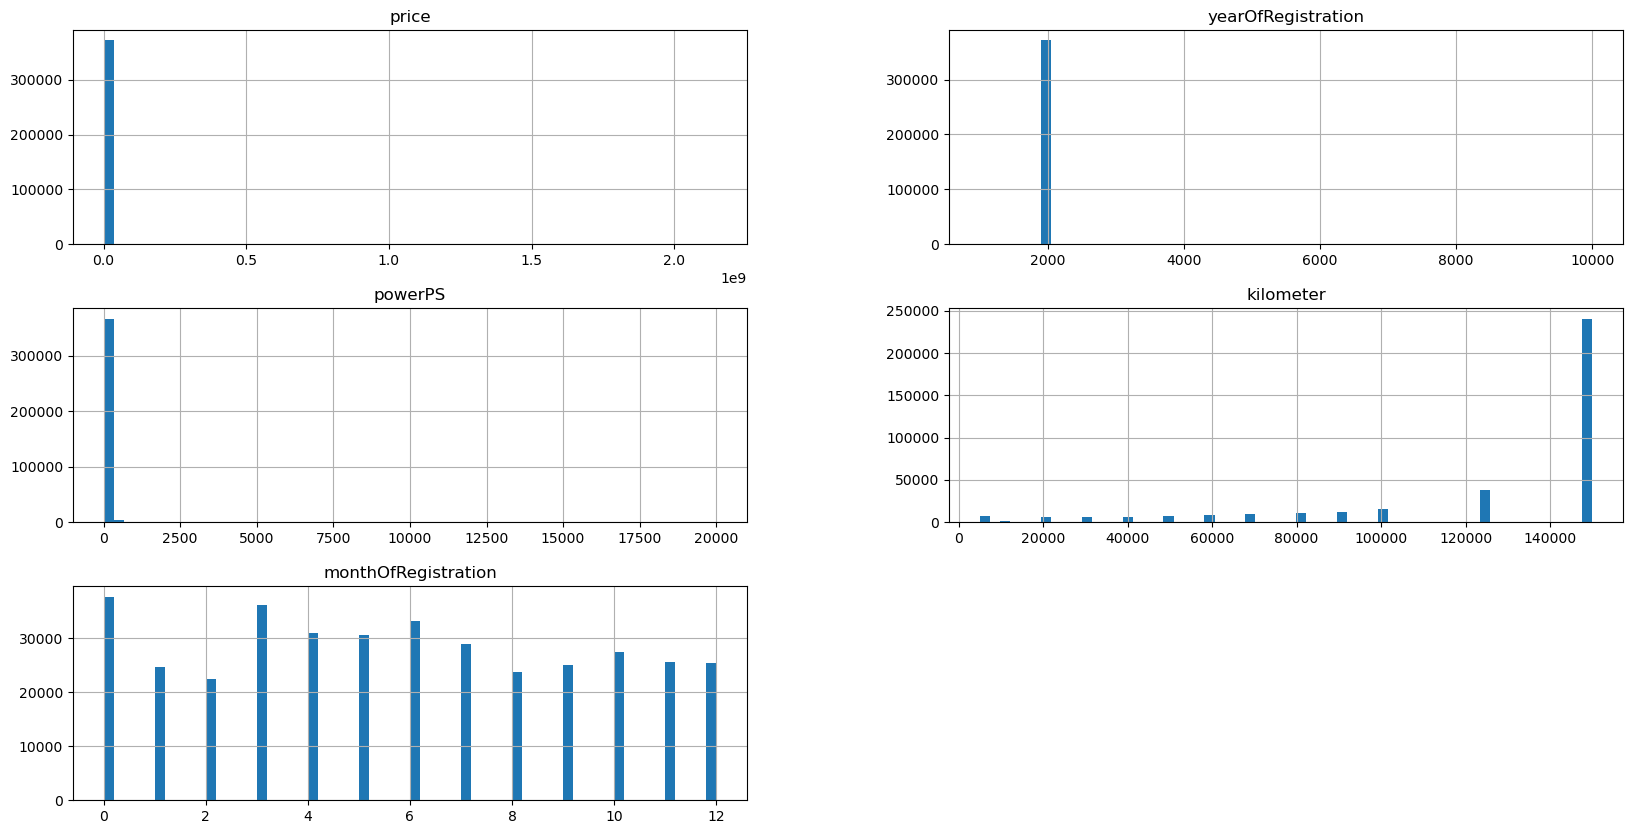

In [28]:
df.hist(bins=60,figsize=(20,10))

In [29]:
df[df.price>100000]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
996,Porsche_997_GT3_MKII_EIN_SAMMLERSTÃCK_IN_VOLL...,139997,test,coupe,2010,manual,435,911,20000,3,petrol,porsche,no
1846,BMW_M1_Museumsfahrzeug_Neuwagenzustand_Glossy_...,579000,control,coupe,1980,manual,277,andere,20000,12,petrol,bmw,no
2735,Ferrari_California_F1,120000,test,convertible,2012,automatic,666,golf,20000,7,petrol,sonstige_autos,no
4359,Mercedes_Benz_SL_280,185000,test,convertible,1971,automatic,170,sl,5000,7,petrol,mercedes_benz,no
5907,Porsche_911T_2.4_Targa,119000,control,convertible,1973,manual,140,911,150000,4,petrol,porsche,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366727,Porsche_911_Soft_Window_Targa,105000,test,convertible,1968,manual,0,911,100000,1,petrol,porsche,no
366861,Ferrari_FXX__unfallfrei__perfekter_Zustand,3895000,test,coupe,2006,manual,799,golf,5000,4,petrol,sonstige_autos,no
367041,Maserati_MC12,1600000,test,coupe,2005,manual,625,golf,10000,4,petrol,sonstige_autos,no
367669,BMW_M3_CSL_1.Hd_dt,165000,control,coupe,2004,automatic,360,m_reihe,30000,2,petrol,bmw,no


In [30]:
df[df.price<300]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
7,VW_Derby_Bj_80__Scheunenfund,0,test,limousine,1980,manual,50,andere,40000,7,petrol,volkswagen,no
32,Golf_3_....._1.4,245,test,limousine,1994,manual,0,golf,150000,2,petrol,volkswagen,no
40,Suche_Opel_corsa_a_zu_verschenken,0,test,limousine,1990,manual,0,corsa,150000,1,petrol,opel,no
60,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÃNDEWAGEN_LE...,1,control,suv,1994,manual,286,golf,150000,11,petrol,sonstige_autos,no
61,Bmw_316i_compact.____200â¬,200,test,coupe,1995,manual,102,3er,150000,4,petrol,bmw,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371427,Opel_Astra_FCC,150,test,smallcar,1993,manual,55,astra,150000,3,petrol,opel,yes
371431,Seat_Arosa,0,control,smallcar,1999,manual,37,arosa,150000,7,petrol,seat,yes
371464,Seat_Arosa_/_1999_/_Tuev_06.2016,99,test,smallcar,1999,manual,60,arosa,150000,1,petrol,seat,yes
371495,Opel_Tigra,180,control,limousine,1995,manual,0,golf,125000,3,petrol,opel,no


In [31]:
df.drop(df[df['price'] > 100000].index, inplace = True)

In [32]:
df.drop(df[df['price'] < 300].index, inplace = True)

In [33]:
df[df.price>100000]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [34]:
df[df.price<300]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [35]:
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,test,limousine,1993,manual,0,golf,150000,0,petrol,volkswagen,no
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manual,190,golf,125000,5,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,no
3,GOLF_4_1_4__3TÃRER,1500,test,smallcar,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallcar,2008,manual,69,fabia,90000,7,diesel,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manual,0,golf,20000,1,petrol,sonstige_autos,no
371524,Smart_smart_leistungssteigerung_100ps,1199,test,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,no
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manual,102,transporter,150000,3,diesel,volkswagen,no
371526,VW_Golf_Kombi_1_9l_TDI,3400,test,stationwagon,2002,manual,100,golf,150000,6,diesel,volkswagen,no


In [36]:
df[df.yearOfRegistration>2017]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
22,Opel_Meriva_1.Hand_TÃV_3.2018,2900,test,limousine,2018,manual,90,meriva,150000,5,petrol,opel,no
58,Seat_inca_1.9SDI___LKW_Zulassung___TÃV_NEU,2399,test,limousine,2018,manual,64,andere,125000,3,petrol,seat,no
168,OPEL_astra_G_TÃV_NEU,1200,control,limousine,2018,manual,75,astra,150000,0,petrol,opel,no
202,Renault_Twingo_Lazuli_sport_1.2_16V_TÃV_2_jahre,2800,control,limousine,2018,manual,75,twingo,125000,12,petrol,renault,no
367,Vw_golf_2_TÃV_neu_!!,1050,test,limousine,2018,manual,0,golf,150000,0,petrol,volkswagen,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371056,GOLF_Tuev_2/2018_Glasschiebedach,999,control,limousine,2018,manual,0,golf,150000,8,petrol,volkswagen,no
371110,Sehr_gepflegter_Renult_Kombi_aus_1hand_und_neu...,1670,control,limousine,2018,manual,0,golf,90000,0,petrol,renault,no
371146,Volkswagen_UP!_High_Up!_NAVI__GLAS_SD__Sitzhzg...,10980,test,limousine,2018,manual,75,golf,20000,1,petrol,volkswagen,no
371354,FORD_Fiesta__2.Hand__TÃV_neu,2140,test,limousine,2018,manual,80,fiesta,150000,6,petrol,ford,no


In [37]:
df[df.yearOfRegistration<1900]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
19125,Subaru_Impreza_Wrx_2.0,7999,test,limousine,1500,manual,224,impreza,5000,3,petrol,subaru,no
35964,UNFAL_Auto,450,control,limousine,1800,manual,1800,golf,5000,2,petrol,mitsubishi,no
40733,Suche_einen_Trabant_mit_12v,1234,control,limousine,1234,manual,26,golf,5000,1,petrol,trabant,no
56160,Polo_86c_TÃV_01.17__sofort_fahrbereit__auch_T...,330,test,limousine,1000,manual,0,polo,5000,0,petrol,volkswagen,no
58295,Citroen_Picasso,500,control,limousine,1000,manual,0,golf,5000,0,petrol,citroen,yes
58964,Autos_zum_verkauf,950,test,limousine,1400,manual,1400,golf,125000,4,petrol,volkswagen,no
69429,Buggy_150ccm_50_60_kmh_mit_StrassenZulassung,1300,test,limousine,1000,automatic,0,golf,5000,6,petrol,sonstige_autos,no
74945,Vw_Golf_2_cl__gl...,500,test,limousine,1000,manual,0,golf,5000,0,petrol,volkswagen,no
82993,Renault_Estafette_R2137,4750,control,limousine,1000,manual,0,andere,5000,0,petrol,renault,no
96376,Suche_guenstig_Auto_mit_tuev,400,control,limousine,1000,manual,0,golf,5000,0,petrol,sonstige_autos,no


In [38]:
df.drop(df[df['yearOfRegistration'] > 2017].index, inplace = True)

In [39]:
df.drop(df[df['yearOfRegistration'] < 1900].index, inplace = True)

In [40]:
df[df.yearOfRegistration>2017]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [41]:
df[df.yearOfRegistration<1900]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [42]:
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,test,limousine,1993,manual,0,golf,150000,0,petrol,volkswagen,no
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manual,190,golf,125000,5,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,no
3,GOLF_4_1_4__3TÃRER,1500,test,smallcar,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallcar,2008,manual,69,fabia,90000,7,diesel,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manual,0,golf,20000,1,petrol,sonstige_autos,no
371524,Smart_smart_leistungssteigerung_100ps,1199,test,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,no
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manual,102,transporter,150000,3,diesel,volkswagen,no
371526,VW_Golf_Kombi_1_9l_TDI,3400,test,stationwagon,2002,manual,100,golf,150000,6,diesel,volkswagen,no


In [43]:
df[df.powerPS<20]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,test,limousine,1993,manual,0,golf,150000,0,petrol,volkswagen,no
15,KA_Lufthansa_Edition_450â¬_VB,450,test,smallcar,1910,manual,0,ka,5000,0,petrol,ford,no
37,Renault_Kangoo_1.9_Diesel,1500,test,limousine,2016,manual,0,kangoo,150000,1,diesel,renault,no
54,Opel_signum_1.9_cdti,4700,control,stationwagon,2005,manual,0,signum,150000,0,petrol,opel,no
55,auto_opel_astra,550,test,stationwagon,1999,manual,0,astra,150000,8,diesel,opel,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371493,Top_Zustand,3299,test,limousine,2005,automatic,0,outlander,150000,4,petrol,mitsubishi,no
371504,220_cdi_Benz,2600,control,limousine,2005,automatic,0,c_klasse,150000,9,petrol,mercedes_benz,no
371518,Bmw_320_D_DPF_Touring_!!!,3999,test,stationwagon,2005,manual,3,3er,150000,5,diesel,bmw,no
371521,Opel_Zafira_1.6_Elegance_TÃV_12/16,1150,control,bus,2000,manual,0,zafira,150000,3,petrol,opel,no


In [44]:
df[df.powerPS>1500]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
8038,VW_LUPO_1_4_16V_SCHWARZ_75PS_SPORTFAHRWERK_ABT...,1499,test,smallcar,1999,manual,7515,lupo,150000,4,petrol,volkswagen,no
10148,Opel_zafira_2999â¬,2599,control,limousine,2016,manual,1779,zafira,150000,0,petrol,opel,no
10368,Ford_Focus_Kombi_Schwarz_DEFEKT,550,test,stationwagon,2003,manual,1753,focus,150000,1,diesel,ford,yes
20022,BMW_535_touring,9750,test,stationwagon,2005,automatic,2729,5er,150000,7,diesel,bmw,no
21020,Mercedes_Benz_e_270,2200,control,limousine,2002,automatic,1704,e_klasse,150000,1,petrol,mercedes_benz,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365025,Golf_3/3_Tueren,850,control,limousine,1993,automatic,9012,golf,150000,0,petrol,volkswagen,no
365133,Opel_Corsa_1.7_cdti,3000,control,coupe,2007,manual,2007,corsa,150000,3,diesel,opel,yes
365581,Audi_A6_C4,1000,test,stationwagon,1996,manual,2598,a6,150000,7,petrol,audi,no
365806,Top_gepflegter_Scenic_von_Privat,7500,control,limousine,2011,manual,1548,scenic,90000,4,petrol,renault,no


In [45]:
df.drop(df[df['powerPS'] > 1500].index, inplace = True)

In [46]:
df.drop(df[df['powerPS'] < 20 ].index, inplace = True)

In [47]:
df[df.powerPS<20]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [48]:
df[df.powerPS>1500]

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage


In [49]:
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manual,190,golf,125000,5,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,no
3,GOLF_4_1_4__3TÃRER,1500,test,smallcar,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallcar,2008,manual,69,fabia,90000,7,diesel,skoda,no
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,turbo_defekt,3200,control,limousine,2004,manual,225,leon,150000,5,petrol,seat,yes
371524,Smart_smart_leistungssteigerung_100ps,1199,test,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,no
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manual,102,transporter,150000,3,diesel,volkswagen,no
371526,VW_Golf_Kombi_1_9l_TDI,3400,test,stationwagon,2002,manual,100,golf,150000,6,diesel,volkswagen,no


In [50]:
df.mode()['monthOfRegistration'] [0]

3

In [51]:
df['monthOfRegistration']=df['monthOfRegistration'].replace(to_replace=0,value=3)

In [52]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,311966.000000,311966.000000,311966.000000,311966.000000,311966.000000
mean,6280.683097,2003.602143,127.681459,125367.299642,6.191341
std,7759.600587,7.028568,64.878345,39228.603464,3.341287
min,300.000000,1910.000000,20.000000,5000.000000,1.000000
25%,1500.000000,1999.000000,82.000000,100000.000000,3.000000
50%,3500.000000,2004.000000,116.000000,150000.000000,6.000000
75%,8000.000000,2008.000000,150.000000,150000.000000,9.000000
max,100000.000000,2017.000000,1500.000000,150000.000000,12.000000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yearOfRegistration'}>],
       [<AxesSubplot:title={'center':'powerPS'}>,
        <AxesSubplot:title={'center':'kilometer'}>],
       [<AxesSubplot:title={'center':'monthOfRegistration'}>,
        <AxesSubplot:>]], dtype=object)

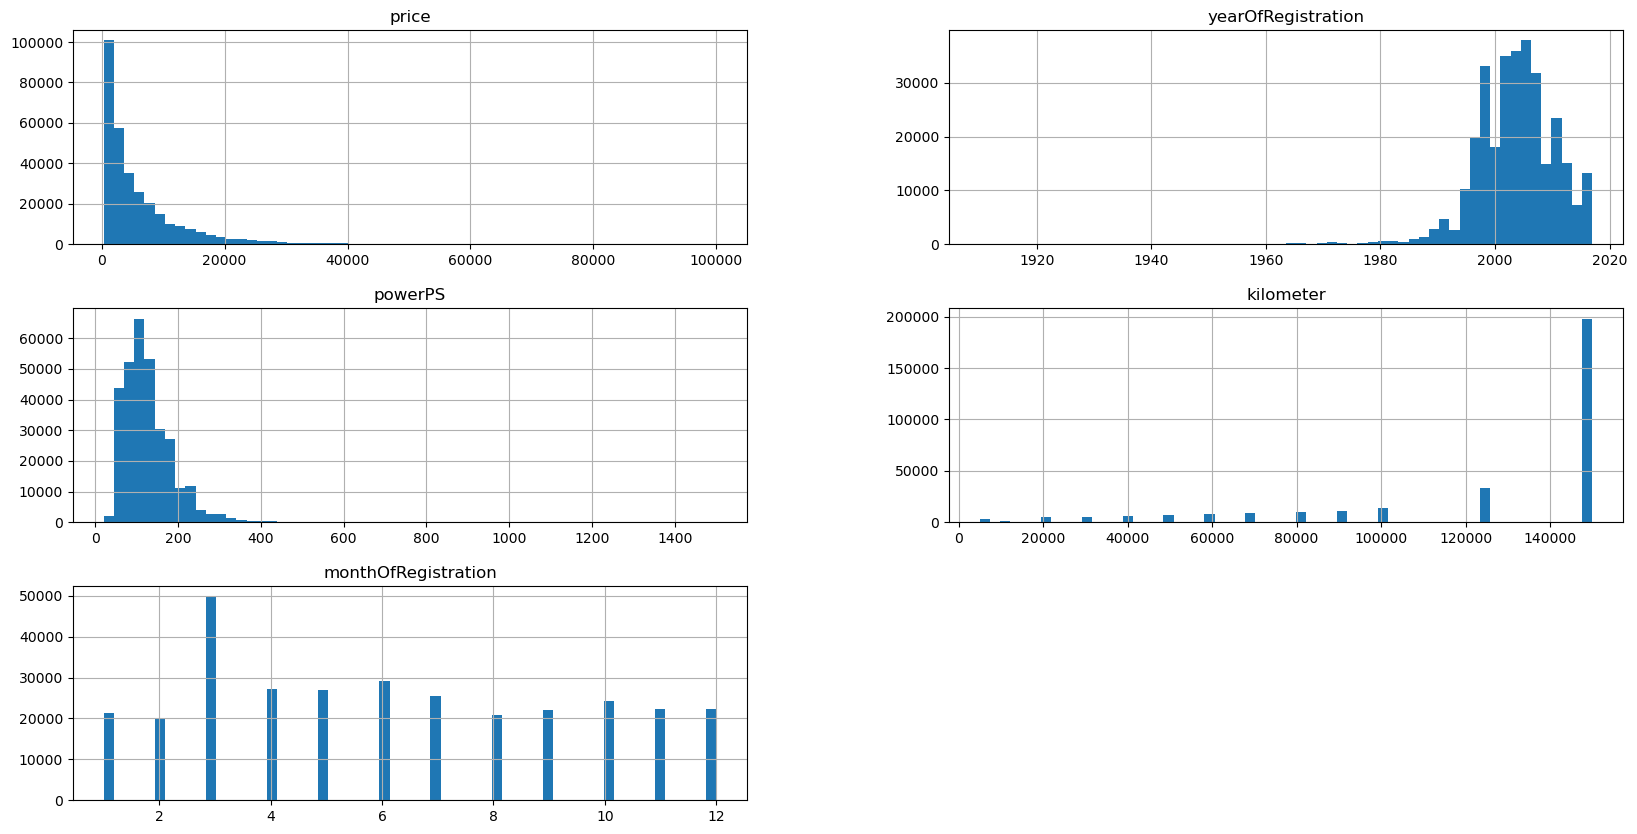

In [53]:
df.hist(bins=60,figsize=(20,10))

In [55]:
df.to_csv(r'D:\Masters\DMML\Project\Datasets\Germany cleaned.csv', index = False)